## import necessary library




In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from sklearn.metrics import precision_score, recall_score, f1_score
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

## read dataset

In [3]:
import tensorflow as tf

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tourist attraction in egypt/dataset/train')
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tourist attraction in egypt/dataset/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    #image_size=(180, 180),
    #batch_size=32
)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tourist attraction in egypt/dataset/valid',
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 288 files belonging to 12 classes.
Found 288 files belonging to 12 classes.
Using 231 files for training.
Found 20 files belonging to 8 classes.
Using 4 files for validation.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import tensorflow_datasets as tfds

batch_size = 64
dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['Amenemhet III', 'AmenhotebIII and wife Tiye', 'Hatshepsut', 'Ikhnaton', 'Khufo', 'Menkaura', 'Nefretete', 'Ramesses II', 'Thutmose III', 'Tut Ankh Amun', 'Tutankhamun and wife Ankhsenamun', 'khafra']


In [7]:
size = (512, 512)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_validation = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

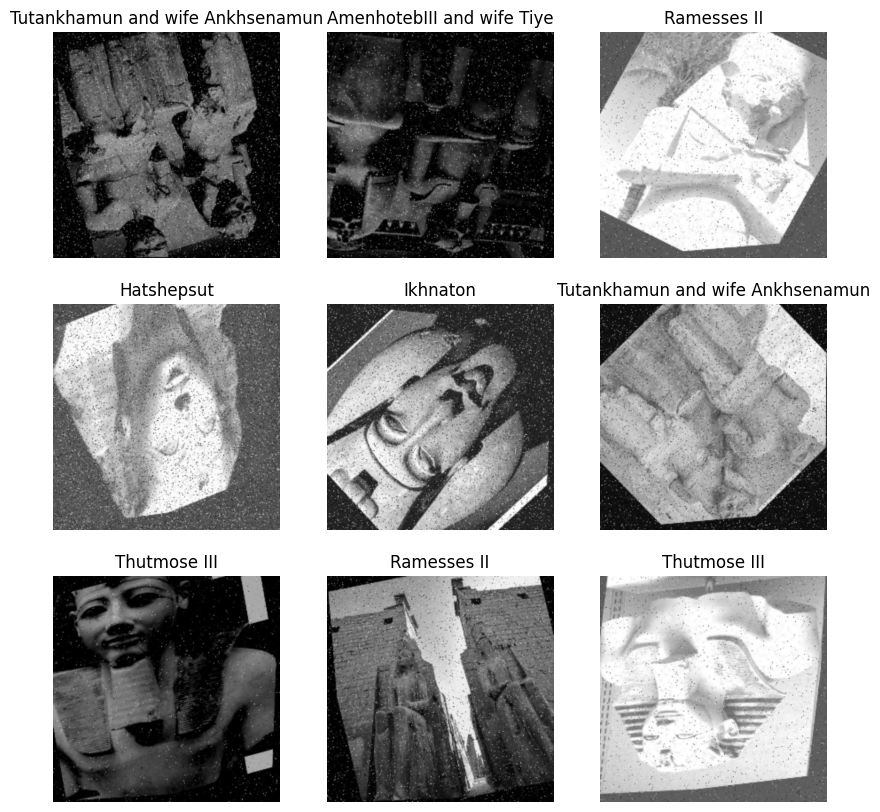

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
imgs = []
#for image in ds_train:
  #img = cv2.GaussianBlur(image)
  #imgs.append()
  #pass
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



image = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.1),
  layers.RandomTranslation(height_factor = 0.1, width_factor = 0.1)
],
  name = "image",
)

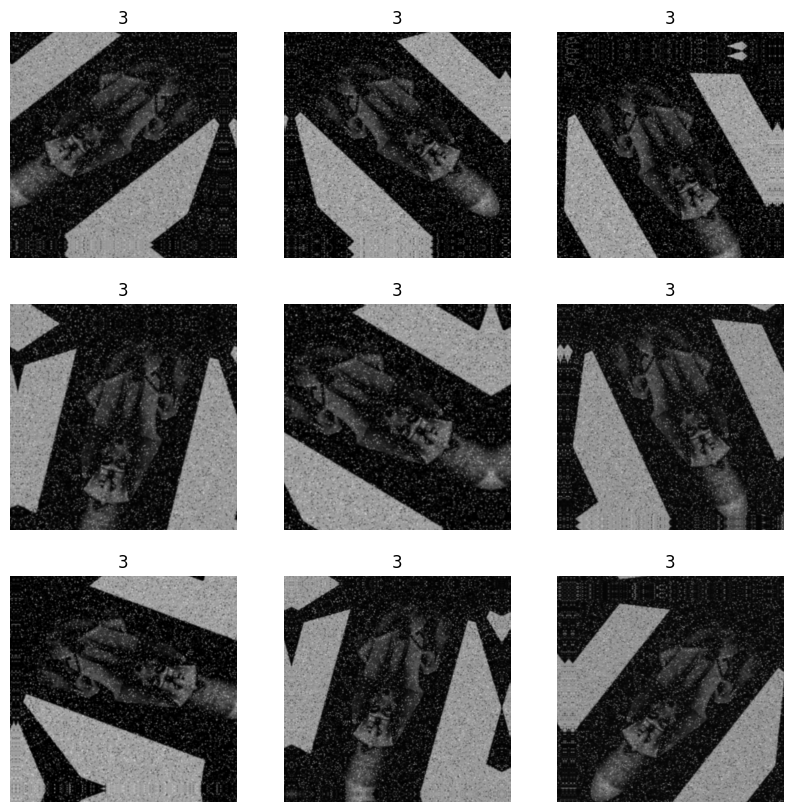

In [10]:
import numpy as np

for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  def f(x):
    return int(x)
  f2 = np.vectorize(f)
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    augmented_image = image(
        tf.expand_dims(first_image, 0), training=True
    )
    x = np.array(images)
    y = np.array(labels)
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(f2(labels[0]))
    plt.axis("off")

## ***train and test dataset***

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
le = preprocessing.LabelEncoder()
le.fit(np.concatenate((y_train, y_test)))
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (512, 512, 3)
Shape of an image in x_test:  (512, 512, 3)


In [12]:
le = preprocessing.LabelEncoder()
le.fit(np.concatenate((y_train, y_test))) #Fit the label encoder to the combined training and test data
y_train = le.transform(y_train) # Transform y_train
y_test = le.transform(y_test) #Transform y_test
# Determine the number of classes based on the maximum label value
num_classes = np.max(np.concatenate((y_train, y_test))) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes) # Use num_classes derived from data
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes) # Use num_classes derived from data
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test)

In [13]:
print ("x_train shape:", x_train.shape)
print ("y_train shape:", y_train.shape)
print ("x_test shape:", x_test.shape)
print ("y_test shape:", y_test.shape)

x_train shape: (21, 512, 512, 3)
y_train shape: (21, 10)
x_test shape: (11, 512, 512, 3)
y_test shape: (11, 10)


In [14]:
from keras.applications import vgg16

img_rows, img_cols = 512, 512

vgg = vgg16.VGG16(weights='imagenet'
                          , include_top=False
                           , input_shape=(img_rows, img_cols, 3))

for layer in vgg.layers:
    layer.trainable = False

    for (i, layer) in enumerate(vgg.layers):
        print(str(i), layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True
0 InputLayer False
1 Conv2D False
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D Fal

In [15]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

num_classes = y_train.shape[1]

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 512, 512, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 512, 512, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 256, 256, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 128, 128, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 64, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 16,819,530 (64.16 MB)

 Trainable params: 2,104,842 (8.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [18]:
from tensorflow.keras.models import Model #Fixed typo in module name.
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [52]:
import cv2
import numpy as np

# Assuming x_train is a numpy array of images
x_train_resized = np.array([cv2.resize(img, (512, 512)) for img in x_train])
num_classes = y_train.shape[1] # Get the number of classes from y_train

# Redefine the FC_Head and model with the correct number of classes
FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)

# Recompile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

# Now use x_train_resized in model.fit
history = model.fit(x_train_resized, y_train,
                       epochs=4,
                       validation_data=(x_test, y_test),
                       verbose=1,
                       initial_epoch=0)

Epoch 1/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 108s 108s/step - accuracy: 0.0476 - loss: 2.9944 - val_accuracy: 0.1818 - val_loss: 7.3961
Epoch 2/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 142s 142s/step - accuracy: 0.6190 - loss: 2.0321 - val_accuracy: 0.1818 - val_loss: 7.6012
Epoch 3/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 134s 134s/step - accuracy: 0.5238 - loss: 2.6188 - val_accuracy: 0.1818 - val_loss: 6.0885
Epoch 4/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 105s 105s/step - accuracy: 0.7619 - loss: 0.9371 - val_accuracy: 0.1818 - val_loss: 6.6549


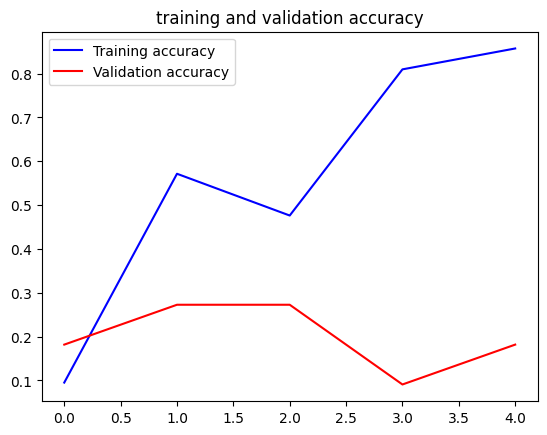

<Figure size 640x480 with 0 Axes>

In [28]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title("training and validation accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()

In [54]:
# Step 1: Upload the image
from google.colab import files
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Step 2: Load and preprocess the image
# Resize the image to match the model's input shape (512x512)
img = load_img(filename, target_size=(512, 512))  # Resize to (512, 512)
img_array = img_to_array(img) / 255.0  # Normalize pixel values (0-1)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
print(f"Image shape after preprocessing: {img_array.shape}")  # (1, 512, 512, 3)

# Step 4: Predict the class of the uploaded image
predictions = model.predict(img_array)

# Step 5: Get the predicted class index and label (if available)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
print(f"Predicted class index: {predicted_class}")
img.show(img)
# Optional: If you have class labels, map the index to the label
#class_labels = ['cat', 'dog', 'car']  # Modify based on your model's classes
predicted_label = class_names[predicted_class]
print(f"Predicted label: {predicted_label}")

Saving Menkaura_4_jpg.rf.d9baf2c9ed460c0e53fd47344a8022a3.jpg to Menkaura_4_jpg.rf.d9baf2c9ed460c0e53fd47344a8022a3.jpg
Uploaded file: Menkaura_4_jpg.rf.d9baf2c9ed460c0e53fd47344a8022a3.jpg
Image shape after preprocessing: (1, 512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class index: 5
Predicted label: Menkaura
